In [1]:
from train import CarNumbersDataset
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import copy
from utils import get_cosine_power_annealing_scheduler


import matplotlib.pyplot as plt

In [2]:
train_transform = A.Compose([
    A.LongestMaxSize(max_size=224),
    A.PadIfNeeded(224, 224),
    A.ShiftScaleRotate(p=0.5, rotate_limit=5),
    A.ColorJitter(hue=0.02),
    A.PixelDropout(drop_value=None, dropout_prob=0.02),
])
dataset = CarNumbersDataset('../dataset/classification/train.csv', transform=train_transform)

In [3]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

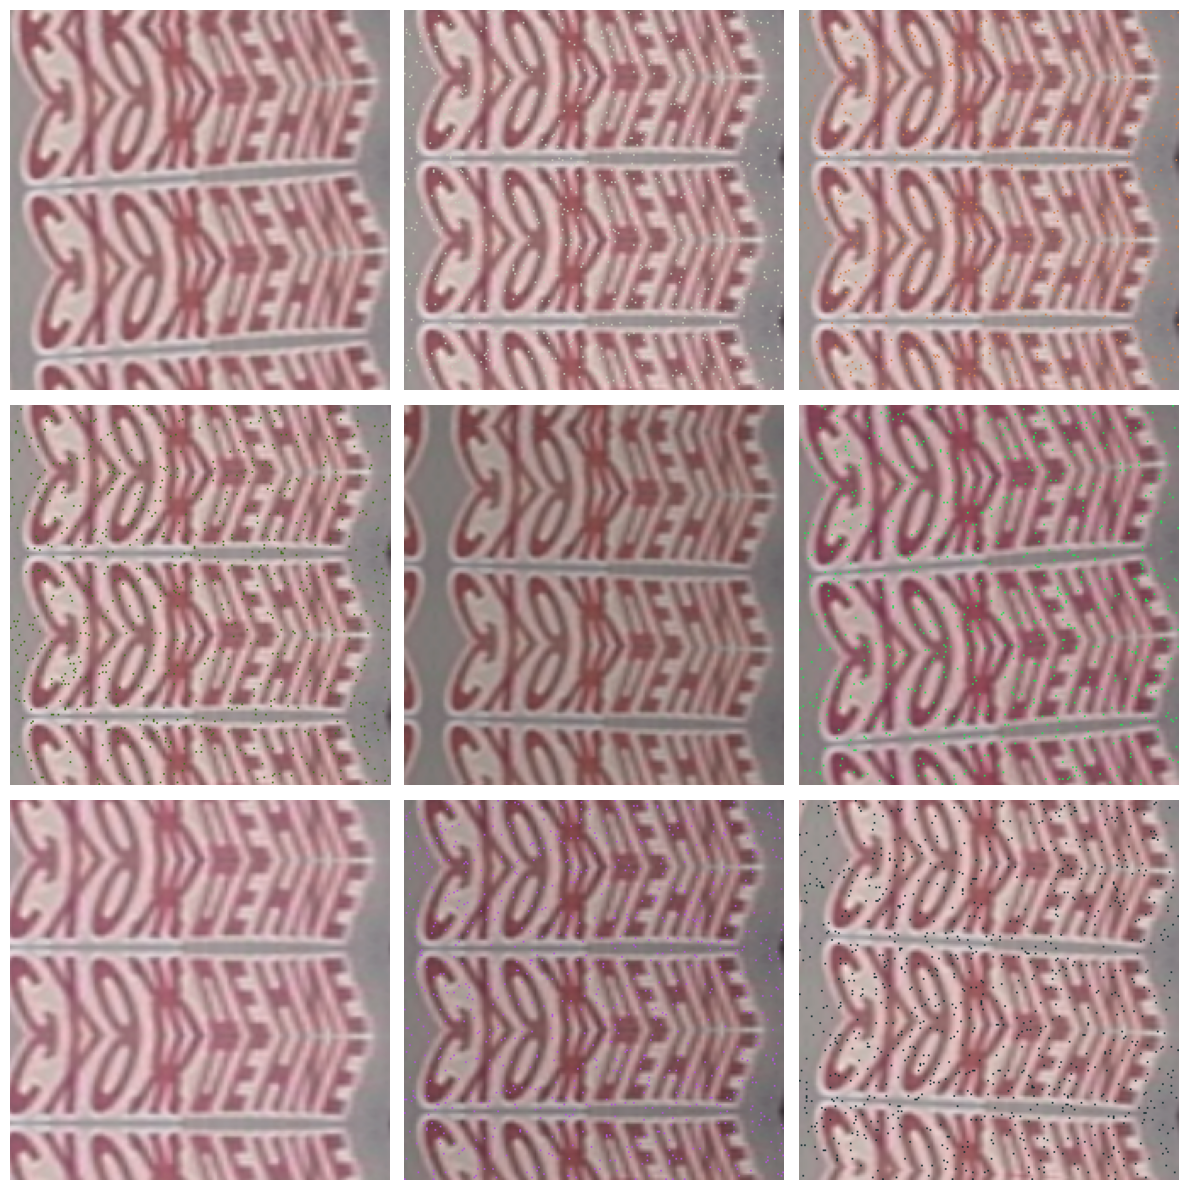

In [4]:
index = np.random.randint(len(dataset))
visualize_augmentations(dataset, idx=index, samples=9, cols=3)

In [5]:
def show_lr_schedule(epochs, scheduler):
    """Plots a learning rate schedule."""
    lr_history = []
    for epoch in range(epochs):
        current_lr = scheduler.optimizer.param_groups[0]['lr']
        lr_history.append(current_lr)
        scheduler.optimizer.step()
        scheduler.step()
    plt.plot(lr_history)
    plt.show()

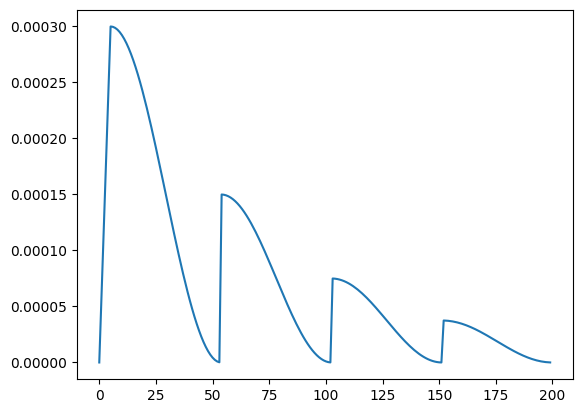

In [6]:
# Check scheduler
dummy = torch.nn.Conv2d(10, 10, 3)
scheduler = get_cosine_power_annealing_scheduler(torch.optim.Adam(dummy.parameters(), lr=0.0003), 5, 200, 4, gamma=0.5)
show_lr_schedule(200, scheduler)